# Latar Belakang

Dina, seorang instruktur kebugaran, seringkali ingin tahu bagaimana dia dapat mengontrol detak jantungnya selama latihan. Dia menduga bahwa kecepatan rata-rata (Avg Speed), jumlah langkah per menit (Avg Cadence), dan jumlah kalori yang terbakar (Calories) semuanya dapat berkontribusi terhadap detak jantung maksimum (Max Heart Rate) yang dia capai selama berolahraga. Untuk itu, Dina memutuskan menggunakan regresi linear berganda untuk mempelajari hubungan ini.

**Studi Kasus:**

*   Tujuan: Memprediksi detak jantung maksimum berdasarkan faktor-faktor yang berkaitan dengan aktivitas olahraga.
*   List item
Variabel:
          - Fitur (X): Avg Speed (km/jam), Avg Cadence (langkah/menit),
                                 Calories (kilocalorie)
          -Target (y): Max Heart Rate (denyut/menit)

# Membaca Dataset

In [ ]:
# memanggil fungsi drive sebagai permulaan sebelum menyambungkan
from google.colab import drive

# mulai menyambungkan colab ke drive, supaya colab bisa mengakses folder dan file dari drive
drive.mount('/content/drive', force_remount=True)

# merujuk ke lokasi folder tempat kamu menyimpan semua keperluan selam summer club ini
PATH = "/content/drive/MyDrive/Summer Club Explorer 2024/"

Mounted at /content/drive


In [ ]:
# memanggil pandas di proyek ini untuk digunakan lebih lanjut
import pandas as pd

# membuat variabel yang memiliki nilai dalam bentuk tabel
df = pd.read_csv("/content/drive/MyDrive/Summer Club Explorer 2024/dataset.csv")

# menampilkan 5 baris pertama dari dataset
df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


In [ ]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   activity_day    1000 non-null   object 
 2   workout_type    1000 non-null   object 
 3   distance        1000 non-null   float64
 4   time            1000 non-null   int64  
 5   calories        1000 non-null   int64  
 6   total_steps     554 non-null    float64
 7   avg_speed       1000 non-null   float64
 8   avg_cadence     1000 non-null   float64
 9   max_cadence     1000 non-null   float64
 10  avg_pace        554 non-null    object 
 11  max_pace        554 non-null    object 
 12  min_pace        554 non-null    object 
 13  avg_heart_rate  1000 non-null   float64
 14  max_heart_rate  1000 non-null   float64
 15  min_heart_rate  1000 non-null   int64  
 16  vo2_max(%)      1000 non-null   int64  
 17  aerobic(%)      1000 non-null   in

# Data Preparation

In [ ]:
print("jumlah kolom pada dataset sebelum kolom Unnamed: 0 dihapus: ", df.shape[1])

# menghapus kolom Unnamed: 0
df.drop('Unnamed: 0', inplace=True, axis=1)
# axis = 1 merupakan penanda jika yang dihapus adalah kolom
# inplace = True merupakan penanda jika dihapusnya secara permanen tidak menyisakan salinannya

print("jumlah kolom pada dataset setelah kolom Unnamed: 0 dihapus: ", df.shape[1])

jumlah kolom pada dataset sebelum kolom Unnamed: 0 dihapus:  21
jumlah kolom pada dataset setelah kolom Unnamed: 0 dihapus:  20


In [ ]:
print("tipe data kolom activity_day sebelum dikonversi: ", df['activity_day'].dtype)

# konversi dari object menjadi datetime
df['activity_day'] = pd.to_datetime(df['activity_day'])

print("tipe data kolom activity_day setelah dikonversi: ", df['activity_day'].dtype)

tipe data kolom activity_day sebelum dikonversi:  object
tipe data kolom activity_day setelah dikonversi:  datetime64[ns]


In [ ]:
# memeriksa kolom mana saja yang memiliki nilai hilang
df.isna().sum()

,0
activity_day,0
workout_type,0
distance,0
time,0
calories,0
total_steps,446
avg_speed,0
avg_cadence,0
max_cadence,0
avg_pace,446


In [ ]:
# memeriksa baris yang memiliki nilai yang hilang
df[df.isna().any(axis=1)].head(5)

,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,NaN,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,NaN,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,NaN,NaN,NaN,95.0,90.0,100,1,32,0,22,43
4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,NaN,NaN,NaN,138.0,166.0,110,7,0,5,21,88
5,2022-01-01,Outdoor Cycling,5.47,117,144,NaN,2.20,43.47,291.67,NaN,NaN,NaN,142.0,177.0,107,44,45,15,57,39


In [ ]:
# memeriksa jenis olahraga yang memang tidak ada nilainya di variabel-variabel terkait langkah
print(df[df.isna().any(axis=1)]["workout_type"].unique())

['Freestyle' 'Indoor Cycling' 'Open Water' 'Outdoor Cycling'
 'Pool Swimming']


In [ ]:
# memeriksa kondisi dataset sebelum dilakukan dropna
print("sebelum dropna")
print("kategori olahraga: ", df["workout_type"].unique())
print("ukuran dataset: ", df.shape)

# contoh menghapus baris-baris data yang memiliki banyak nilai
df.dropna(inplace=True)

# memeriksa kondisi dataset sebelum dilakukan dropna
print("\nsetelah dropna")
print("kategori olahraga: ", df["workout_type"].unique())
print("ukuran dataset: ", df.shape)

sebelum dropna
kategori olahraga:  ['Freestyle' 'Indoor Cycling' 'Walking' 'Open Water' 'Outdoor Cycling'
 'Outdoor Running' 'Trail Run' 'Pool Swimming' 'Trekking' 'Treadmill'
 'Cricket']
ukuran dataset:  (1000, 20)

setelah dropna
kategori olahraga:  ['Walking' 'Outdoor Running' 'Trail Run' 'Trekking' 'Treadmill' 'Cricket']
ukuran dataset:  (554, 20)


In [ ]:
# memeriksa kembali kolom mana saja yang masih memiliki nilai hilang
df.isna().sum()

,0
activity_day,0
workout_type,0
distance,0
time,0
calories,0
total_steps,0
avg_speed,0
avg_cadence,0
max_cadence,0
avg_pace,0


In [ ]:
df.head()

,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,07:58,28:58,07:58,83.0,85.0,81,3,22,0,24,65
7,2022-01-01,Outdoor Running,2.94,26,430,7618.0,10.59,131.93,334.72,06:44,27:44,06:15,145.0,190.0,100,23,0,71,18,3
8,2022-01-01,Trail Run,2.87,26,465,2790.0,32.92,21.42,341.17,06:48,25:50,06:20,142.0,188.0,96,2,0,80,46,13
10,2022-01-01,Trail Run,6.31,107,97,2790.0,22.99,27.99,139.21,06:48,25:50,06:20,138.5,188.0,89,38,0,80,13,16
11,2022-01-01,Outdoor Running,2.37,65,524,7618.0,16.47,164.78,87.60,06:44,27:44,06:15,146.0,190.0,102,17,0,71,46,12


In [ ]:
# fungsi yang mengubah nilai hh:mm menjadi desimal dengan satuan menit
def simplify(pace):
  splitted = pace.split(":") # karena format waktunya adalah mm:ss, maka splitted merupakan variabel array, dimana indeks ke-0 adalah nilai menit dan indeks ke-1 adalah nilai detik
  duration = (float(splitted[0]) * 60.0) + float(splitted[1]) # jumlah detik = (menit * 60) + detik
  result = duration / 60.0
  return result

In [ ]:
# menerapkan fungsi simplify ke kolom avg_pace
df['avg_pace'] = df['avg_pace'].apply(lambda x: simplify(x))

In [ ]:
# menerapkan fungsi simplify ke kolom max_pace
df['max_pace'] = df['max_pace'].apply(lambda x: simplify(x))
# menerapkan fungsi simplify ke kolom min_pace
df['min_pace'] = df['min_pace'].apply(lambda x: simplify(x))

In [ ]:
# memeriksa perubahan data
df.sample(3)

,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
531,2022-01-23,Trekking,2.78,103,393,5028.0,36.84,112.40,170.68,7.916667,24.750000,7.750000,109.0,124.0,94,30,50,0,24,88
874,2022-02-09,Cricket,1.39,23,509,3444.0,9.59,91.26,282.17,7.250000,22.033333,7.033333,99.0,92.0,106,42,40,10,41,88
489,2022-01-22,Treadmill,8.16,38,256,4550.0,31.60,14.81,329.48,7.983333,27.966667,7.966667,96.0,105.0,87,32,26,7,16,14


In [ ]:
# memeriksa tipe data setiap kolom setelah melalui tahap data preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 3 to 994
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   activity_day    554 non-null    datetime64[ns]
 1   workout_type    554 non-null    object        
 2   distance        554 non-null    float64       
 3   time            554 non-null    int64         
 4   calories        554 non-null    int64         
 5   total_steps     554 non-null    float64       
 6   avg_speed       554 non-null    float64       
 7   avg_cadence     554 non-null    float64       
 8   max_cadence     554 non-null    float64       
 9   avg_pace        554 non-null    float64       
 10  max_pace        554 non-null    float64       
 11  min_pace        554 non-null    float64       
 12  avg_heart_rate  554 non-null    float64       
 13  max_heart_rate  554 non-null    float64       
 14  min_heart_rate  554 non-null    int64         
 15  vo2_max(%) 

In [ ]:
# menyimpan data yang telah disiapkan ke dalam file baru bernama prepared_data dengan format csv di folder yang telah kita buat sebelumnya
df.to_csv("prepared_data.csv", index=False)

# Exploratory Data Analysis

In [ ]:
# membuat variabel yang memiliki nilai dalam bentuk tabel
df_prep = pd.read_csv("prepared_data.csv")

# mencetak jumlah baris dan kolom dari dataset
print("jumlah baris: ", df_prep.shape[0], "\njumlah kolom: ", df_prep.shape[1])

jumlah baris:  554 
jumlah kolom:  20


In [ ]:
df_prep.head()

,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,7.966667,28.966667,7.966667,83.0,85.0,81,3,22,0,24,65
1,2022-01-01,Outdoor Running,2.94,26,430,7618.0,10.59,131.93,334.72,6.733333,27.733333,6.250000,145.0,190.0,100,23,0,71,18,3
2,2022-01-01,Trail Run,2.87,26,465,2790.0,32.92,21.42,341.17,6.800000,25.833333,6.333333,142.0,188.0,96,2,0,80,46,13
3,2022-01-01,Trail Run,6.31,107,97,2790.0,22.99,27.99,139.21,6.800000,25.833333,6.333333,138.5,188.0,89,38,0,80,13,16
4,2022-01-01,Outdoor Running,2.37,65,524,7618.0,16.47,164.78,87.60,6.733333,27.733333,6.250000,146.0,190.0,102,17,0,71,46,12


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity_day    554 non-null    object 
 1   workout_type    554 non-null    object 
 2   distance        554 non-null    float64
 3   time            554 non-null    int64  
 4   calories        554 non-null    int64  
 5   total_steps     554 non-null    float64
 6   avg_speed       554 non-null    float64
 7   avg_cadence     554 non-null    float64
 8   max_cadence     554 non-null    float64
 9   avg_pace        554 non-null    float64
 10  max_pace        554 non-null    float64
 11  min_pace        554 non-null    float64
 12  avg_heart_rate  554 non-null    float64
 13  max_heart_rate  554 non-null    float64
 14  min_heart_rate  554 non-null    int64  
 15  vo2_max(%)      554 non-null    int64  
 16  aerobic(%)      554 non-null    int64  
 17  anaerobic(%)    554 non-null    int

In [ ]:
# memanggil matplotlib di proyek ini untuk dimanfaatkan pada visualisasi data
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

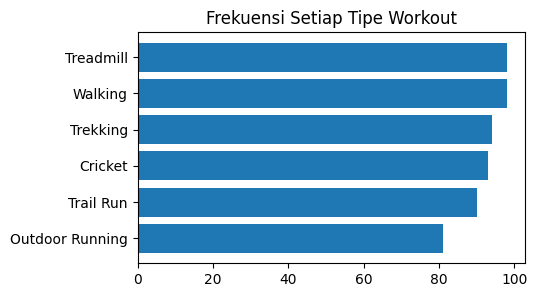

In [ ]:
# menghitung jumlah kemunculan setiap kategori pada kolom workout_type
workout = df_prep['workout_type'].value_counts().sort_values()

# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(5,3))
plt.title('Frekuensi Setiap Tipe Workout')
# menampilkan horizontal bar chart
plt.barh(workout.index, workout.values)

(array([24., 22., 26., 30., 37., 31., 18., 36., 22., 34., 20., 33., 31.,
        22., 31., 17., 25., 20., 28., 47.]),
 array([ 20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
         75.,  80.,  85.,  90.,  95., 100., 105., 110., 115., 120.]),
 <BarContainer object of 20 artists>)

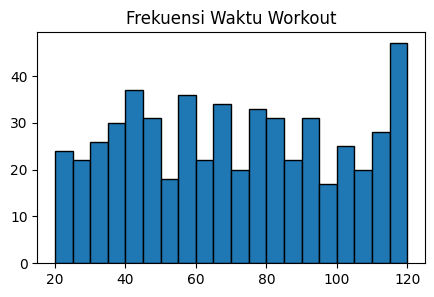

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(5,3))
plt.title('Frekuensi Waktu Workout')
# menampilkan histogram dengan bins 20
plt.hist(df_prep['time'], bins=20, edgecolor='black')

In [ ]:
print("nilai mean dari kolom time: ", df_prep['time'].mean())
print("nilai median dari kolom time: ", df_prep['time'].median())
print("nilai mode dari kolom time: ", df_prep['time'].mode()[0])

nilai mean dari kolom time:  70.47292418772564
nilai median dari kolom time:  69.0
nilai mode dari kolom time:  111


(array([ 98.,  93.,   0.,  98.,   0.,   0.,   0.,  94.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 171.]),
 array([ 85.  ,  90.25,  95.5 , 100.75, 106.  , 111.25, 116.5 , 121.75,
        127.  , 132.25, 137.5 , 142.75, 148.  , 153.25, 158.5 , 163.75,
        169.  , 174.25, 179.5 , 184.75, 190.  ]),
 <BarContainer object of 20 artists>)

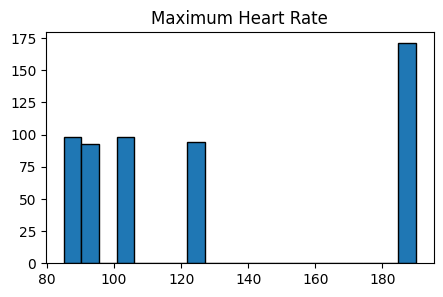

In [ ]:
# menampilkan histogram max_heart_rate
plt.figure(figsize=(5,3))
plt.title('Maximum Heart Rate')
plt.hist(df_prep['max_heart_rate'], bins=20, edgecolor='black')

In [ ]:
# menampilkan nilai mean, median, dan mode dari kolom max_heart_rate
print("nilai mean dari kolom max_heart_rate:", df_prep['max_heart_rate'].mean())
print("nilai median dari kolom max_heart_rate:", df_prep['max_heart_rate'].median())
print("nilai mode dari kolom max_heart_rate:", df_prep['max_heart_rate'].mode()[0])

nilai mean dari kolom max_heart_rate: 128.41516245487364
nilai median dari kolom max_heart_rate: 105.0
nilai mode dari kolom max_heart_rate: 85.0


(array([25., 29., 25., 29., 30., 37., 21., 30., 36., 28., 24., 21., 20.,
        34., 25., 29., 32., 26., 19., 34.]),
 array([ 1.   ,  2.895,  4.79 ,  6.685,  8.58 , 10.475, 12.37 , 14.265,
        16.16 , 18.055, 19.95 , 21.845, 23.74 , 25.635, 27.53 , 29.425,
        31.32 , 33.215, 35.11 , 37.005, 38.9  ]),
 <BarContainer object of 20 artists>)

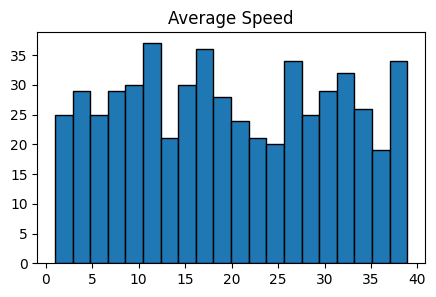

In [ ]:
# menampilkan histogram avg_speed
plt.figure(figsize=(5,3))
plt.title('Average Speed')
plt.hist(df_prep['avg_speed'], bins=20, edgecolor='black')

In [ ]:
# menampilkan nilai mean, median, dan mode dari kolom avg_speed
print("nilai mean dari kolom avg_speed:", df_prep['avg_speed'].mean())
print("nilai median dari kolom avg_speed:", df_prep['avg_speed'].median())
print("nilai mode dari kolom avg_speed:", df_prep['avg_speed'].mode()[0])

nilai mean dari kolom avg_speed: 19.813501805054152
nilai median dari kolom avg_speed: 19.18
nilai mode dari kolom avg_speed: 1.73


(array([27., 27., 34., 17., 24., 27., 28., 18., 32., 19., 23., 29., 34.,
        30., 39., 34., 33., 21., 33., 25.]),
 array([ 10.35  ,  19.8215,  29.293 ,  38.7645,  48.236 ,  57.7075,
         67.179 ,  76.6505,  86.122 ,  95.5935, 105.065 , 114.5365,
        124.008 , 133.4795, 142.951 , 152.4225, 161.894 , 171.3655,
        180.837 , 190.3085, 199.78  ]),
 <BarContainer object of 20 artists>)

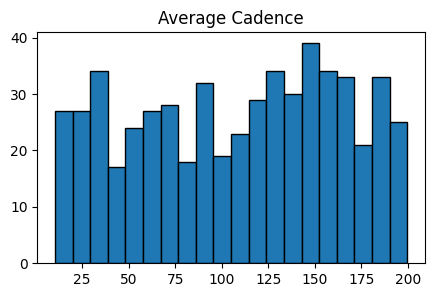

In [ ]:
# menampilkan histogram avg_cadence
plt.figure(figsize=(5,3))
plt.title('Average Cadence')
plt.hist(df_prep['avg_cadence'], bins=20, edgecolor='black')

In [ ]:
# menampilkan nilai mean, median, dan mode dari kolom avg_cadence
print("nilai mean dari kolom avg_cadence:", df_prep['avg_cadence'].mean())
print("nilai median dari kolom avg_cadence:", df_prep['avg_cadence'].median())
print("nilai mode dari kolom avg_cadence:", df_prep['avg_cadence'].mode()[0])

nilai mean dari kolom avg_cadence: 108.39680505415163
nilai median dari kolom avg_cadence: 115.045
nilai mode dari kolom avg_cadence: 14.81


(array([27., 24., 26., 26., 21., 26., 36., 29., 19., 38., 30., 26., 25.,
        31., 28., 28., 26., 29., 29., 30.]),
 array([ 10.,  37.,  64.,  91., 118., 145., 172., 199., 226., 253., 280.,
        307., 334., 361., 388., 415., 442., 469., 496., 523., 550.]),
 <BarContainer object of 20 artists>)

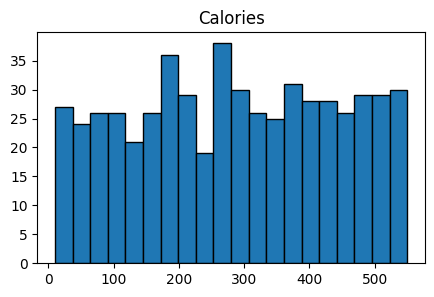

In [ ]:
# menampilkan histogram calories
plt.figure(figsize=(5,3))
plt.title('Calories')
plt.hist(df_prep['calories'], bins=20, edgecolor='black')

In [ ]:
# menampilkan nilai mean, median, dan mode dari kolom calories
print("nilai mean dari kolom calories:", df_prep['calories'].mean())
print("nilai median dari kolom calories:", df_prep['calories'].median())
print("nilai mode dari kolom calories:", df_prep['calories'].mode()[0])

nilai mean dari kolom calories: 285.3104693140794
nilai median dari kolom calories: 281.5
nilai mode dari kolom calories: 267


(array([36., 23., 26., 24., 39., 20., 23., 25., 36., 30., 24., 20., 40.,
        25., 25., 30., 31., 18., 26., 33.]),
 array([ 0.  ,  2.25,  4.5 ,  6.75,  9.  , 11.25, 13.5 , 15.75, 18.  ,
        20.25, 22.5 , 24.75, 27.  , 29.25, 31.5 , 33.75, 36.  , 38.25,
        40.5 , 42.75, 45.  ]),
 <BarContainer object of 20 artists>)

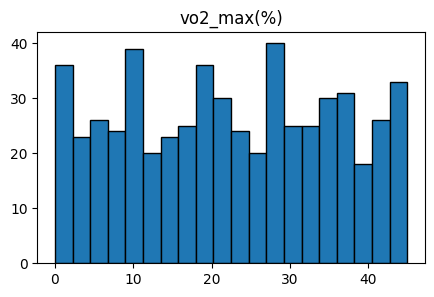

In [ ]:
# menampilkan histogram VO2_max(%)
plt.figure(figsize=(5,3))
plt.title('vo2_max(%)')
plt.hist(df_prep['vo2_max(%)'], bins=20, edgecolor='black')

In [ ]:
# menampilkan nilai mean, median, dan mode dari kolom vo2_max(%)
print("nilai mean dari kolom vo2_max(%):", df_prep['vo2_max(%)'].mean())
print("nilai median dari kolom vo2_max(%):", df_prep['vo2_max(%)'].median())
print("nilai mode dari kolom vo2_max(%):", df_prep['vo2_max(%)'].mode()[0])

nilai mean dari kolom vo2_max(%): 22.32129963898917
nilai median dari kolom vo2_max(%): 22.0
nilai mode dari kolom vo2_max(%): 19


In [ ]:
# memanggil library seaborn dan numpy
import seaborn as sns
import numpy as np

In [ ]:
# menyeleksi kolom dalam dataset yang berupa data numerik untuk dihitung nilai korelasi antar kolomnya
numerical_data = df_prep.select_dtypes(include=['int64', 'float64'])

# memeriksa apakah data numerikal sudah terseleksi
numerical_data.sample(1)

,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
103,1.43,25,348,3444.0,2.2,127.65,207.4,7.25,22.033333,7.033333,99.0,92.0,106,43,40,10,25,49


In [ ]:
# menghitung nilai korelasi antara kolom pada dataset
correlation = numerical_data.corr(method='pearson')

<Axes: >

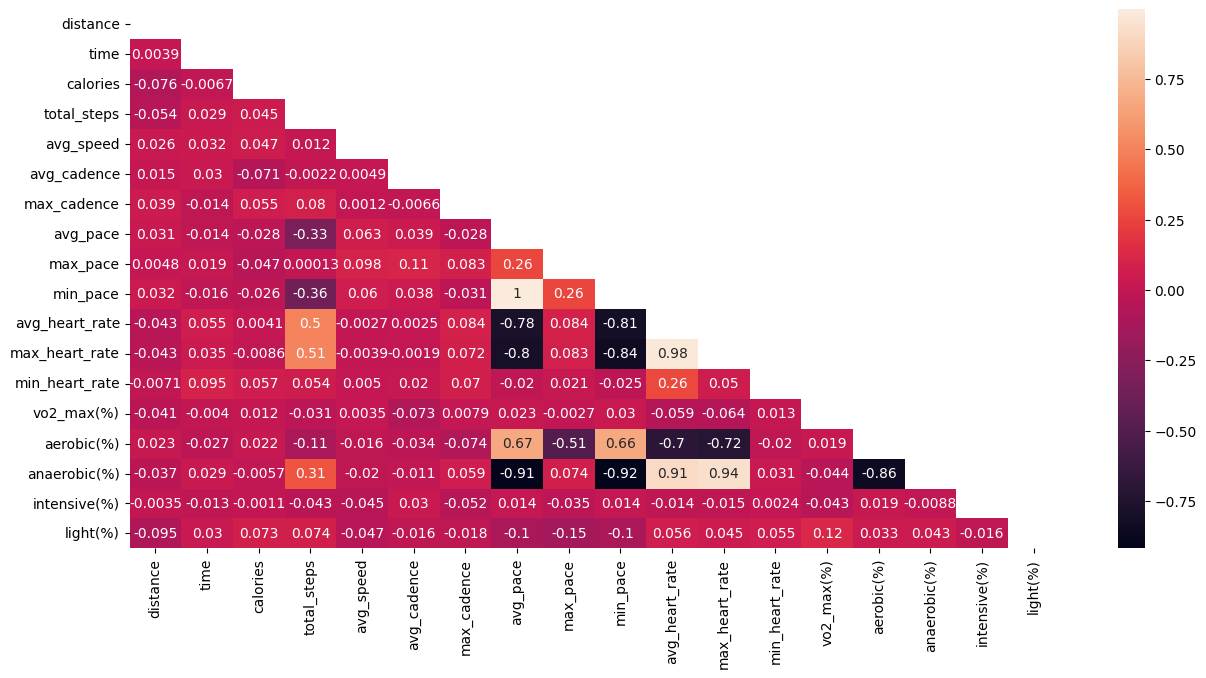

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(15,7))

# membuat nilai korelasi tidak tampil secara duplikat
mask = np.triu(np.ones_like(correlation))

# menampilkan
sns.heatmap(correlation, annot=True, mask=mask)

In [ ]:
# menampilkan nilai korelasi yang terurut
corr_series = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool)).stack().sort_values(ascending=False)
print(corr_series.to_string())

avg_pace        min_pace          0.996758
avg_heart_rate  max_heart_rate    0.976462
max_heart_rate  anaerobic(%)      0.939260
avg_heart_rate  anaerobic(%)      0.913762
avg_pace        aerobic(%)        0.672531
min_pace        aerobic(%)        0.661491
total_steps     max_heart_rate    0.505967
                avg_heart_rate    0.500240
                anaerobic(%)      0.313073
avg_heart_rate  min_heart_rate    0.264414
max_pace        min_pace          0.256678
avg_pace        max_pace          0.256607
vo2_max(%)      light(%)          0.118273
avg_cadence     max_pace          0.107462
avg_speed       max_pace          0.097749
time            min_heart_rate    0.095398
max_pace        avg_heart_rate    0.084479
max_cadence     avg_heart_rate    0.084476
max_pace        max_heart_rate    0.082873
max_cadence     max_pace          0.082822
total_steps     max_cadence       0.080336
                light(%)          0.074037
max_pace        anaerobic(%)      0.073808
calories   

karena ingin menggunakan kolom max_heart_rate, maka berdasarkan heatmap di atas, dapat diketahui:


*   total_steps, avg_heart_rate, dan anaerobic(%) memiliki korelasi paling tinggi pada max_heart_rate, yakni 0.51, 0.98, dan 0.94
*   avg_pace, min_pace, dan aerobic(%) memiliki korelasi paling negatif pada max_heart_rate, yakni -0.8, -0.84, dan -0.72



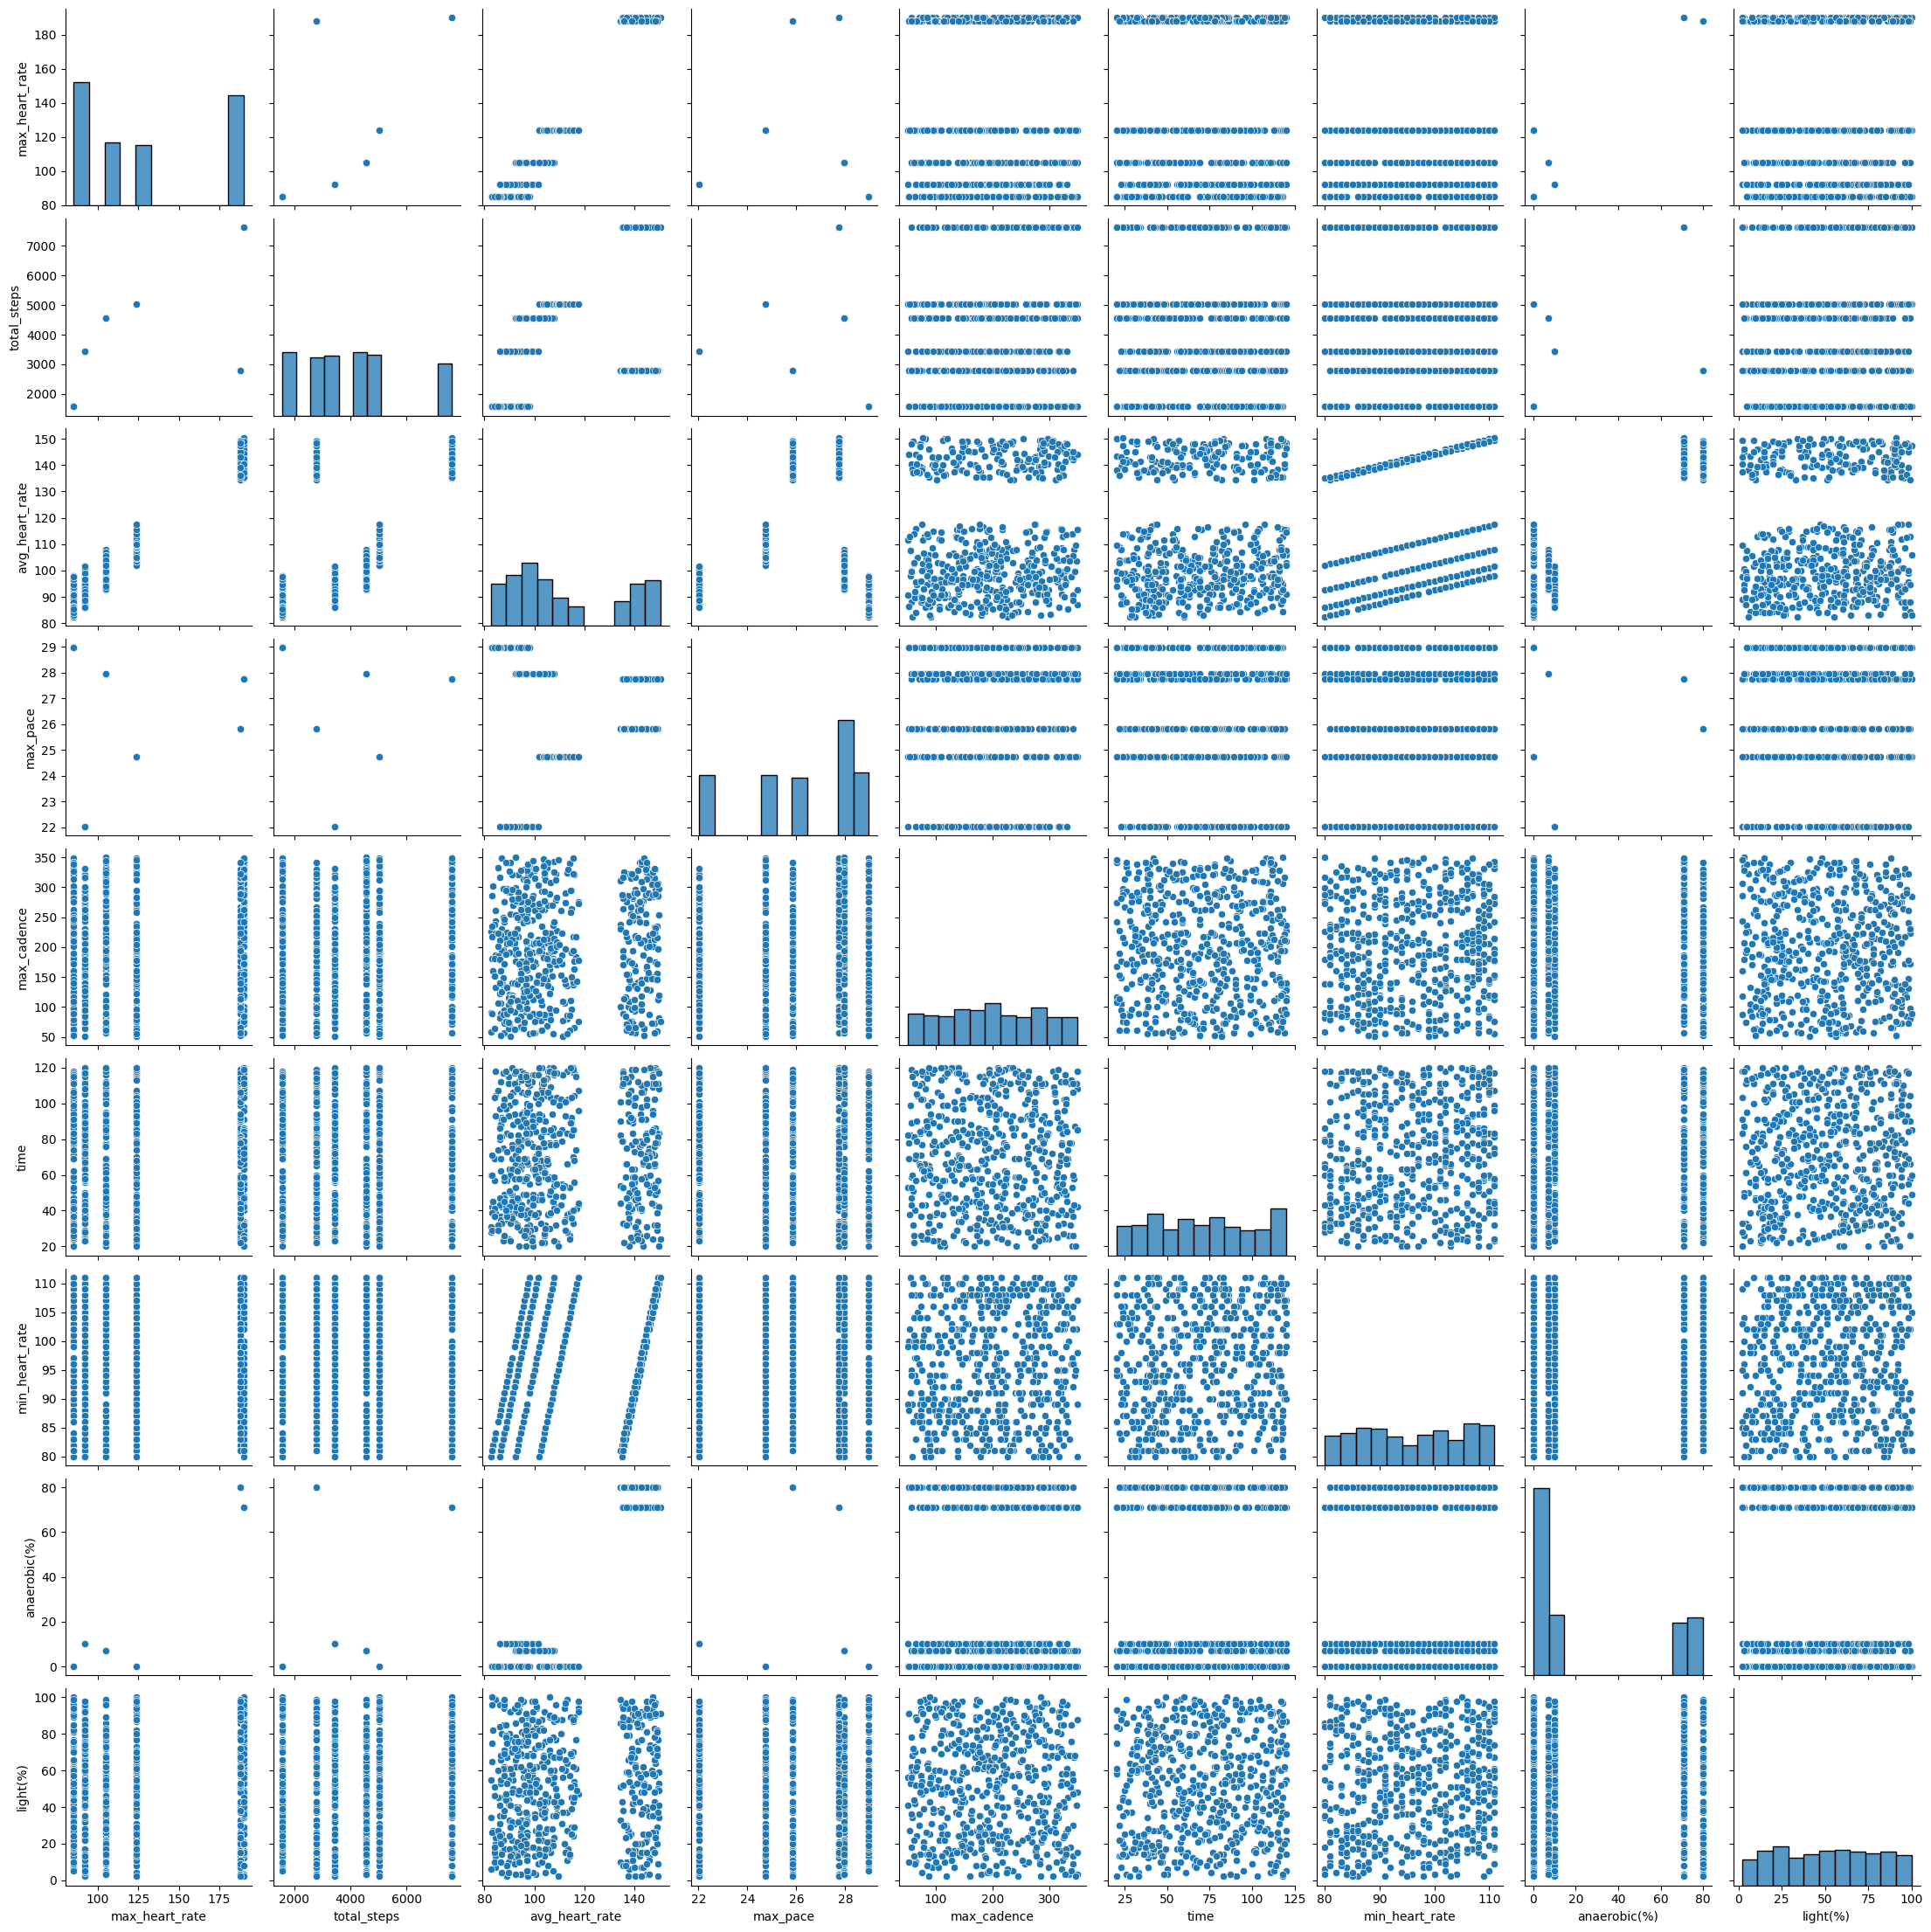

In [ ]:
#melihat persebaran data pada variabel yang memiliki korelasi tinggi dengan max_heart_rate
sebaran_data = df_prep.get(["max_heart_rate", "total_steps", "avg_heart_rate", "max_pace", "max_cadence",
                            "time", "min_heart_rate", "anaerobic(%)", "light(%)"])

data_distribution = pd.DataFrame(sebaran_data)

# Visualisasi menggunakan pairplot
sns.pairplot(data_distribution)
plt.show()

<Axes: xlabel='max_heart_rate', ylabel='total_steps'>

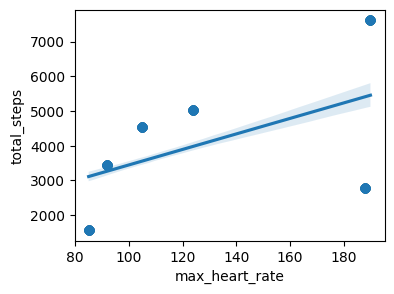

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan total_steps
sns.regplot(data=df_prep, x="max_heart_rate", y="total_steps")

<Axes: xlabel='max_heart_rate', ylabel='anaerobic(%)'>

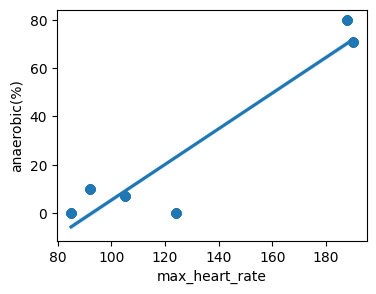

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan total_steps
sns.regplot(data=df_prep, x="max_heart_rate", y="anaerobic(%)")

<Axes: xlabel='max_heart_rate', ylabel='avg_heart_rate'>

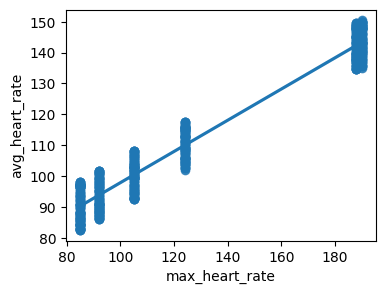

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan avg_heart_rate
sns.regplot(data=df_prep, x="max_heart_rate", y="avg_heart_rate")

<Axes: xlabel='max_heart_rate', ylabel='avg_speed'>

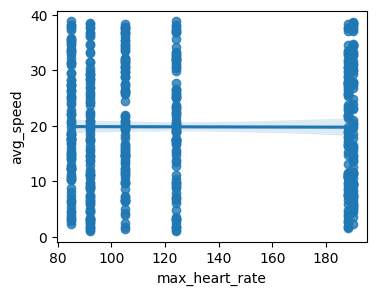

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan avg_speed
sns.regplot(data=df_prep, x="max_heart_rate", y="avg_speed")

<Axes: xlabel='max_heart_rate', ylabel='avg_cadence'>

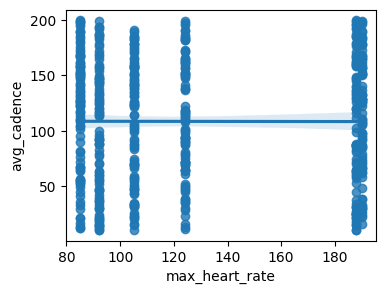

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan avg_cadence
sns.regplot(data=df_prep, x="max_heart_rate", y="avg_cadence")

<Axes: xlabel='max_heart_rate', ylabel='calories'>

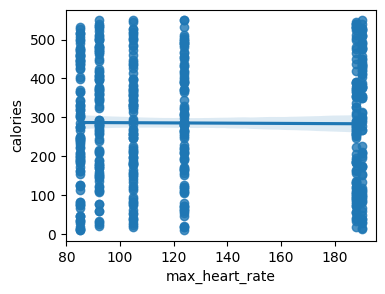

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan calories
sns.regplot(data=df_prep, x="max_heart_rate", y="calories")

<Axes: xlabel='max_heart_rate', ylabel='vo2_max(%)'>

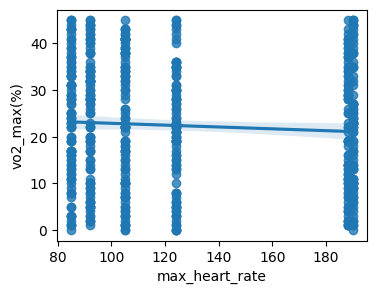

In [ ]:
# mengatur besaran grafik yang ditampilkan
plt.figure(figsize=(4,3))

# menampilkan regression plot untuk kolom max_heart_rate dan vo2_max(%)
sns.regplot(data=df_prep, x="max_heart_rate", y="vo2_max(%)")

In [ ]:
# memanggil alat untuk membantu konversi kategorikal menjadi numerikal
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# mengambil data workout_type untuk dilakukan encoding
workout_type = df_prep[['workout_type']].values

# membuat variabel untuk membantu encoding
encoder = OneHotEncoder(handle_unknown='ignore')

# melakukan encoding terhadap data workout_type
encoded_values = encoder.fit_transform(workout_type).toarray()

# hasil encoding dimasukkan ke dalam dataframe
categorical_data = pd.DataFrame(encoded_values, columns=encoder.categories_[0])

# memeriksa data kategorikal yang telah dilakukan encoding
categorical_data.head(3)

,Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# menggabungkan df_prep dengan categorical_data yang sudah melalui encoding
preprocessed_df = pd.concat([df_prep, categorical_data], axis=1)

# memeriksa isi dataframe yang baru
preprocessed_df.sample(3)

,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
334,2022-01-26,Cricket,6.99,105,259,3444.0,21.71,169.40,264.54,7.250000,...,40,10,24,95,1.0,0.0,0.0,0.0,0.0,0.0
213,2022-01-17,Trail Run,6.53,54,89,2790.0,29.74,139.66,311.80,6.800000,...,0,80,21,10,0.0,0.0,1.0,0.0,0.0,0.0
336,2022-01-26,Treadmill,9.59,54,331,4550.0,30.65,31.63,241.48,7.983333,...,26,7,52,43,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
preprocessed_df = preprocessed_df.drop('workout_type', axis=1)

In [ ]:
preprocessed_df.head()

,activity_day,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
0,2022-01-01,7.91,42,82,1571.0,22.10,29.63,180.16,7.966667,28.966667,...,22,0,24,65,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-01,2.94,26,430,7618.0,10.59,131.93,334.72,6.733333,27.733333,...,0,71,18,3,0.0,1.0,0.0,0.0,0.0,0.0
2,2022-01-01,2.87,26,465,2790.0,32.92,21.42,341.17,6.800000,25.833333,...,0,80,46,13,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-01-01,6.31,107,97,2790.0,22.99,27.99,139.21,6.800000,25.833333,...,0,80,13,16,0.0,0.0,1.0,0.0,0.0,0.0
4,2022-01-01,2.37,65,524,7618.0,16.47,164.78,87.60,6.733333,27.733333,...,0,71,46,12,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# menyimpan data yang telah disiapkan ke dalam file baru bernama preprocessed_data dengan format csv di folder yang telah kita buat sebelumnya
preprocessed_df.to_csv("preprocessed_data.csv", index=False)

# Data Normalization

In [ ]:
# membuat variabel yang memiliki nilai dalam bentuk tabel
data = pd.read_csv("preprocessed_data.csv" )

In [ ]:
data.head()

,activity_day,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
0,2022-01-01,7.91,42,82,1571.0,22.10,29.63,180.16,7.966667,28.966667,...,22,0,24,65,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-01-01,2.94,26,430,7618.0,10.59,131.93,334.72,6.733333,27.733333,...,0,71,18,3,0.0,1.0,0.0,0.0,0.0,0.0
2,2022-01-01,2.87,26,465,2790.0,32.92,21.42,341.17,6.800000,25.833333,...,0,80,46,13,0.0,0.0,1.0,0.0,0.0,0.0
3,2022-01-01,6.31,107,97,2790.0,22.99,27.99,139.21,6.800000,25.833333,...,0,80,13,16,0.0,0.0,1.0,0.0,0.0,0.0
4,2022-01-01,2.37,65,524,7618.0,16.47,164.78,87.60,6.733333,27.733333,...,0,71,46,12,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
print("jumlah baris: ", data.shape[0], "\njumlah kolom: ", data.shape[1])

jumlah baris:  554 
jumlah kolom:  25


In [ ]:
data.shape

(554, 25)

In [ ]:
data.describe()

,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,...,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,5.234332,70.472924,285.310469,4081.119134,19.813502,108.396805,198.640740,7.470969,26.221059,7.256889,...,23.689531,26.294224,36.151625,51.371841,0.167870,0.146209,0.162455,0.176895,0.169675,0.176895
std,2.623014,29.224148,154.200291,1865.429141,10.939334,54.941716,84.033713,0.533864,2.356368,0.718060,...,18.368274,33.359108,18.257415,28.130200,0.374089,0.353635,0.369201,0.381925,0.375686,0.381925
min,1.100000,20.000000,10.000000,1571.000000,1.000000,10.350000,50.560000,6.733333,22.033333,6.250000,...,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.800000,44.250000,160.250000,2790.000000,10.545000,62.575000,131.262500,6.800000,24.750000,6.333333,...,0.000000,0.000000,20.250000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.145000,69.000000,281.500000,3444.000000,19.180000,115.045000,196.610000,7.916667,26.783333,7.750000,...,26.000000,7.000000,36.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.547500,94.000000,419.000000,5028.000000,29.512500,156.675000,272.085000,7.966667,27.966667,7.966667,...,40.000000,71.000000,52.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.980000,120.000000,550.000000,7618.000000,38.900000,199.780000,349.660000,7.983333,28.966667,7.966667,...,50.000000,80.000000,67.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# memanggil standardscaler dari sklearn untuk membantu normalisasi data dengan mudah
from sklearn.preprocessing import StandardScaler

# membuat variabel standardscaler untuk normalisasi data
scaler = StandardScaler()

# mengambil kolom-kolom selain activity_day dan max_heart_rate untuk dilakukan normalisasi data
columns = [column for column in data.columns if column not in ["activity_day", "max_heart_rate"]]

# melakukan normalisasi data
data[columns] = scaler.fit_transform(data[columns])

# memeriksa dataframe setelah dilakukan normalisasi data
data.tail(3)

,activity_day,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
551,2022-02-14,-0.856404,1.148276,0.991098,-1.346815,-0.869531,0.790700,-1.069712,0.929348,1.166239,...,-0.092064,-0.788930,-0.720995,-0.796015,-0.44915,-0.41382,-0.440415,-0.463586,-0.452048,2.157096
552,2022-02-14,-1.306675,-0.427188,-1.358620,0.251580,1.371203,-0.769451,-1.178219,0.960596,0.741474,...,0.125900,-0.578902,-1.598144,-1.472056,-0.44915,-0.41382,-0.440415,2.157096,-0.452048,-0.463586
553,2022-02-14,-1.169304,1.216774,-0.735491,-1.346815,-0.859467,0.469525,0.916880,0.929348,1.166239,...,-0.092064,-0.788930,0.868836,0.200256,-0.44915,-0.41382,-0.440415,-0.463586,-0.452048,2.157096


In [ ]:
data.describe()

,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_pace,max_pace,min_pace,...,aerobic(%),anaerobic(%),intensive(%),light(%),Cricket,Outdoor Running,Trail Run,Treadmill,Trekking,Walking
count,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,...,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02,5.540000e+02
mean,1.635274e-16,-2.252510e-16,1.539082e-16,-3.847704e-17,-6.412841e-18,-4.809630e-17,3.847704e-17,2.010426e-15,2.629265e-16,-5.979974e-16,...,4.969951e-17,3.527062e-17,-1.154311e-16,8.016051e-17,4.969951e-17,-6.412841e-17,8.016051e-18,-1.603210e-17,8.336693e-17,3.206420e-18
std,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,...,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00,1.000904e+00
min,-1.577600e+00,-1.728657e+00,-1.787022e+00,-1.346815e+00,-1.721358e+00,-1.786173e+00,-1.763751e+00,-1.382939e+00,-1.778801e+00,-1.403503e+00,...,-1.290864e+00,-7.889296e-01,-1.707787e+00,-1.756705e+00,-4.491496e-01,-4.138204e-01,-4.404152e-01,-4.635863e-01,-4.520485e-01,-4.635863e-01
25%,-9.289054e-01,-8.981142e-01,-8.117591e-01,-6.927553e-01,-8.480295e-01,-8.347613e-01,-8.025247e-01,-1.257951e+00,-6.248549e-01,-1.287345e+00,...,-1.290864e+00,-7.889296e-01,-8.717551e-01,-9.027583e-01,-4.491496e-01,-4.138204e-01,-4.404152e-01,-4.635863e-01,-4.520485e-01,-4.635863e-01
50%,-3.408783e-02,-5.044648e-02,-2.473350e-02,-3.418489e-01,-5.796279e-02,1.211139e-01,-2.418762e-02,8.356070e-01,2.388347e-01,6.873471e-01,...,1.258995e-01,-5.789022e-01,-8.312326e-03,2.235059e-02,-4.491496e-01,-4.138204e-01,-4.404152e-01,-4.635863e-01,-4.520485e-01,-4.635863e-01
75%,8.826709e-01,8.057836e-01,8.677698e-01,5.080529e-01,8.874182e-01,8.795107e-01,8.747755e-01,9.293484e-01,7.414737e-01,9.893588e-01,...,8.887721e-01,1.341348e+00,8.688359e-01,8.762972e-01,-4.491496e-01,-4.138204e-01,-4.404152e-01,-4.635863e-01,-4.520485e-01,-4.635863e-01
max,1.810877e+00,1.696263e+00,1.718082e+00,1.897728e+00,1.746336e+00,1.664778e+00,1.798751e+00,9.605955e-01,1.166239e+00,9.893588e-01,...,1.433681e+00,1.611383e+00,1.691162e+00,1.730244e+00,2.226430e+00,2.416507e+00,2.270585e+00,2.157096e+00,2.212152e+00,2.157096e+00


In [ ]:
# menyimpan data yang telah disiapkan ke dalam file baru bernama scaled_data dengan format csv di folder yang telah kita buat sebelumnya
data.to_csv("scaled_data.csv", index=False)

# Pemodelan dan Evaluasi

## Pemodelan & Evaluasi Percobaan 1

Berdasarkan Study Case #3, kami ingin memprediksi detak jantung maksimum saat berolahraga dengan dugaan bahwa variabel avg_speed, avg_cadence, dan calories dapat berkontribusi terhadap max_heart_rate. Maka dari itu kami lakukan percobaannya untuk mengetahui apakah dugaan tersebut benar atau tidak.

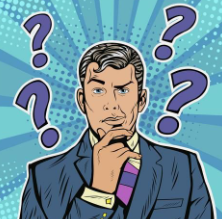

#### Model 1

In [ ]:
# memilih kolom yang dijadikan variabel dependen
dependents = ['avg_speed', 'avg_cadence', 'calories']

In [ ]:
# membuat variabel X yang diisi dengan variabel-varibel dependen
X = data[dependents].values

# membuat varibel y yang diisi dengan variabel independen
y = data['max_heart_rate'].values

# menampilkan ukuran dari varibel X dan y
print("ukuran X: ", X.shape, "\n ukuran y: ", y.shape)

ukuran X:  (554, 3) 
 ukuran y:  (554,)


In [ ]:
# memanggil train_test_split dari sklearn untuk membantu membagi data menjadi 2
from sklearn.model_selection import train_test_split

# membagi data menjadi 2: train 90% dan test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Mencetak ukuran data
print("ukuran data train: ", X_train.shape)
print("ukuran data test: ", X_test.shape)

ukuran data train:  (498, 3)
ukuran data test:  (56, 3)


In [ ]:
# memanggil LinearRegression dari sklearn untuk mempermudah pembuatan model regresi linier
from sklearn.linear_model import LinearRegression

# membuat variabel yang menampung regresi linier
model = LinearRegression()

# memasukkan data train ke regresi linier
model.fit(X_train, y_train)

# mencetak nilai coefficient dan intercept
print("coefficient: ", model.coef_)
print("intercept: ", model. intercept_)

coefficient:  [-0.72397176 -0.03081932 -0.50792284]
intercept:  128.33736361251042


#### Evaluasi model 1

In [ ]:
# memprediksi nilai max_heart_rate dari data test
y_pred = model.predict(X_test)

# menampilkan perbandingan antara nilai max_heart_rate sebenarnya dengan hasil prediksi
y_df = pd.DataFrame({
    "nilai sebenarnya": y_test,
    "hasil prediksi": y_pred
})
y_df.head(3)

,nilai sebenarnya,hasil prediksi
0,85.0,127.538054
1,85.0,127.855003
2,85.0,128.329451


In [ ]:
# kita akan menggunakan baris data pertama
X_df = pd.DataFrame(X_test, columns=dependents)
X_df.head(1)

,avg_speed,avg_cadence,calories
0,1.423355,-0.941789,-0.397962


In [ ]:
# lalu kita akan memasukkan data tersebut ke rumus regresi linier yang sudah kita ketahui sebelumnya
"""y = 128.33736361251042	+(-0.72397176*avg_speed)+(-0.03081932*avg_cadence)+(-0.50792284*calories)"""
y = 128.33736361251042	+(-0.72397176*1.423355)+(-0.03081932*-0.941789	)+(-0.50792284*-0.941789	)
y

127.81427622817985

In [ ]:
# memanggil mean_absolute_error dari sklearn untuk mencari
from sklearn.metrics import mean_absolute_error

# mencari selisih antara nilai
mean_absolute_error(y_test, y_pred)

38.27811780979011

Dapat dilihat bahwa hasil MAE pada Model Percobaan 1 memiliki nilai error yang besar, yaitu 38.27811780979011. Hal ini membuktikan bahwa ternyata dugaan di awal kurang tepat karena model memiliki error yang besar dalam memprediksi detak jantung maksimum dalam berolahraga.

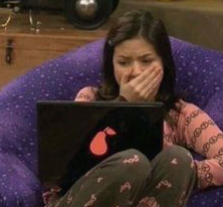

Text(0.5, 1.0, 'Perbandingan nilai asli dengan prediksi model')

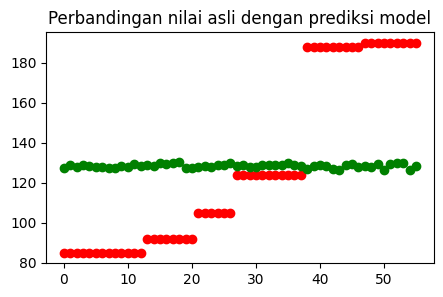

In [ ]:
# menggunakan numpy untuk membantu mengurutkan nilai dalam array
import numpy as np

# menggunakan matplotlib untuk membantu visualisasi perbandingan nilai asli dengan hasil prediksi
import matplotlib.pyplot as plt

# mengatur ukuran grafik
plt.figure(figsize=(5, 3))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted = np.sort(y_test.tolist())
y_sorted_index = np.argsort(y_test.tolist())

# merubah urutan array hasil prediksi berdasarkan urutan y_sorted
predictions_sorted = y_pred[y_sorted_index]

# menampilkan titik-titik yang mengindikasi nilai asli dan hasil prediksi
plt.scatter(np.arange(0,len(y_sorted)), y_sorted, label='Yearly Amount Spent asli', color='red')
plt.scatter(np.arange(0,len(y_sorted)), predictions_sorted, label='Yearly Amount Spent prediction', color='green')

# memberikan judul pada grafik
plt.title("Perbandingan nilai asli dengan prediksi model")

## Pemodelan & Evaluasi Percobaan 2


#### Model 2

Kemudian, berdasarkan heatmap, terdapat 3 variabel yang memiliki korelasi yang tinggi terhadap max_heart_rate, yaitu total_steps sebesar 0.51, avg_heart_rate sebesar 0.98, dan anaerobic(%) sebesar 0.94. Kami membuat dugaan bahwa 3 variabel tersebut dapat memprediksi max_heart_rate lebih baik daripada model 1 sebelumnya. Mari kami buktikan apakah dugaan kami benar atau tidak.

In [ ]:
# memilih kolom yang dijadikan variabel dependen
dependents2 = ['total_steps', 'avg_heart_rate', 'anaerobic(%)']

In [ ]:
# membuat variabel X yang diisi dengan variabel-varibel dependen
X2 = data[dependents2].values

# membuat varibel y yang diisi dengan variabel independen
y2 = data['max_heart_rate'].values

# menampilkan ukuran dari varibel X dan y
print("ukuran X: ", X2.shape, "\n ukuran y: ", y2.shape)

ukuran X:  (554, 3) 
 ukuran y:  (554,)


In [ ]:
# membagi data menjadi 2: train 90% dan test 10%
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)

# Mencetak ukuran data
print("ukuran data train: ", X_train2.shape)
print("ukuran data test: ", X_test2.shape)

ukuran data train:  (498, 3)
ukuran data test:  (56, 3)


In [ ]:
# membuat variabel yang menampung regresi linier
model2 = LinearRegression()

# memasukkan data train ke regresi linier
model2.fit(X_train2, y_train2)

# mencetak nilai coefficient dan intercept
print("coefficient: ", model2.coef_)
print("intercept: ", model2. intercept_)

coefficient:  [ 3.98323364 25.05071891 15.55927403]
intercept:  128.44036259828974


#### Evaluasi Model 2

In [ ]:
# memprediksi nilai avg_pace dari data test
y_pred2 = model2.predict(X_test2)

# menampilkan perbandingan antara nilai avg_pace sebenarnya dengan hasil prediksi
y_df2 = pd.DataFrame({
    "nilai sebenarnya": y_test2,
    "hasil prediksi": y_pred2
})
y_df2.head(3)

,nilai sebenarnya,hasil prediksi
0,85.0,93.411640
1,85.0,79.108523
2,85.0,76.820024


Dapat dilihat bahwa hasil prediksi mendekati dari hasil sebenarnya, lebih baik dibandingkan dengan Model 1.

In [ ]:
# kita akan menggunakan baris data pertama
X_df2 = pd.DataFrame(X_test2, columns=dependents2)
X_df2.head(1)

,total_steps,avg_heart_rate,anaerobic(%)
0,-1.346815,-0.694147,-0.78893


In [ ]:
# lalu kita akan memasukkan data tersebut ke rumus regresi linier yang sudah kita ketahui sebelumnya
"""y = 128.44036259828974	+(3.98323364*total_steps)+(25.05071891*avg_heart_rate)+(15.55927403*-anaerobic(%))

coefficient:  [ 3.98323364 25.05071891 15.55927403]
intercept:  128.44036259828974
"""
y2 = 128.44036259828974	+(3.98323364*-1.346815)+(25.05071891*-0.694147)+(15.55927403*-0.78893)
y2

93.41162434372546

In [ ]:
# mencari selisih antara nilai
mean_absolute_error(y_test2, y_pred2)

5.804671697310612

Dapat dilihat bahwa nilai MAE pada model 2 jauh lebih kecil dibandingkan Model 1, yakni sebesar 5.804671697310612. Namun, nilai error masih terbilang cukup besar. Masih perlu dilakukan percobaan untuk mendapatkan nilai MAE yang lebih kecil atau lebih baik.

Text(0.5, 1.0, 'Perbandingan nilai asli dengan prediksi model')

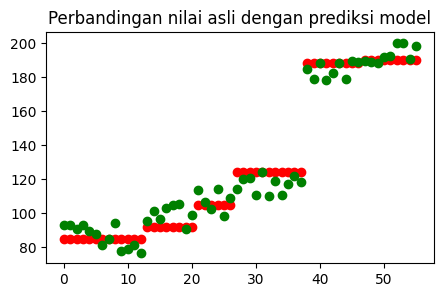

In [ ]:
# mengatur ukuran grafik
plt.figure(figsize=(5, 3))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted2 = np.sort(y_test2.tolist())
y_sorted_index2 = np.argsort(y_test2.tolist())

# merubah urutan array hasil prediksi berdasarkan urutan y_sorted
predictions_sorted2 = y_pred2[y_sorted_index2]

# menampilkan titik-titik yang mengindikasi nilai asli dan hasil prediksi
plt.scatter(np.arange(0,len(y_sorted2)), y_sorted2, label='Yearly Amount Spent asli', color='red')
plt.scatter(np.arange(0,len(y_sorted2)), predictions_sorted2, label='Yearly Amount Spent prediction', color='green')

# memberikan judul pada grafik
plt.title("Perbandingan nilai asli dengan prediksi model")

## Pemodelan & Evaluasi 3

#### Model 3

Berdasarkan percobaan Model 1 dan Model 2, hasilnya masih belum baik. Mari lakukan percobaan sekali lagi dengan menggunakan semua variabel yang memiliki korelasi positif terhadap max_heart_rate, yakni:


*   total_steps = 0.51
*   avg_heart_rate = 0.98
*   max_pace = 0.083
*   max_cadence = 0.072
*   time = 0.035
*   min_heart_rate = 0.05
*   anaerobic(%) = 0.94
*   light(%) = 0.045

Mari dilakukan percobaan dengan menggunakan 8 variabel tersebut sebagai dependents dalam memprediksi max_heart_rate!









In [ ]:
# memilih kolom yang dijadikan variabel dependen
dependents3 = ['total_steps', 'avg_heart_rate', 'anaerobic(%)', 'max_pace', 'max_cadence', 'time', 'min_heart_rate', 'light(%)']

In [ ]:
# membuat variabel X yang diisi dengan variabel-varibel dependen
X3 = data[dependents3].values

# membuat varibel y yang diisi dengan variabel independen
y3 = data['max_heart_rate'].values

# menampilkan ukuran dari varibel X dan y
print("ukuran X: ", X3.shape, "\n ukuran y: ", y3.shape)

ukuran X:  (554, 8) 
 ukuran y:  (554,)


In [ ]:
# membagi data menjadi 2: train 90% dan test 10%
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.1, random_state=42)

# Mencetak ukuran data
print("ukuran data train: ", X_train3.shape)
print("ukuran data test: ", X_test3.shape)

ukuran data train:  (498, 8)
ukuran data test:  (56, 8)


In [ ]:
# membuat variabel yang menampung regresi linier
model3 = LinearRegression()

# memasukkan data train ke regresi linier
model3.fit(X_train3, y_train3)

# mencetak nilai coefficient dan intercept
print("coefficient: ", model3.coef_)
print("intercept: ", model3. intercept_)

coefficient:  [ 6.17320483e-15  4.37854182e+01  0.00000000e+00  2.44249065e-15
  8.88178420e-16  1.77635684e-15 -9.45593429e+00 -4.44089210e-15]
intercept:  128.41516245487364


#### Evaluasi Model 3

In [ ]:
# memprediksi nilai avg_pace dari data test
y_pred3 = model3.predict(X_test3)

# menampilkan perbandingan antara nilai avg_pace sebenarnya dengan hasil prediksi
y_df3 = pd.DataFrame({
    "nilai sebenarnya": y_test3,
    "hasil prediksi": y_pred3
})
y_df3.head(3)

,nilai sebenarnya,hasil prediksi
0,85.0,85.0
1,85.0,85.0
2,85.0,85.0


Dapat dilihat bahwa setelah menggunakan 8 variabel dependents, hasil prediksi menjadi lebih baik terhadap nilai sebenarnya, dibandingkan dengan percobaan sebelumnya.

In [ ]:
# kita akan menggunakan baris data pertama
X_df3 = pd.DataFrame(X_test3, columns=dependents3)
X_df3.head(1)

,total_steps,avg_heart_rate,anaerobic(%),max_pace,max_cadence,time,min_heart_rate,light(%)
0,-1.346815,-0.694147,-0.78893,1.166239,0.69665,-1.18067,1.377089,1.374433


In [ ]:
# mencari selisih antara nilai
mean_absolute_error(y_test3, y_pred3)

8.120488408686859e-15

Dapat dilihat bahwa percobaan Model 3 mendapatkan nilai MAE yang lebih baik dibandingkan dua model sebelumnya. Hal ini membuktikan bahwa dengan menggunakan 8 variabel dependents tersebut, memberikan hasil yang lebih baik dalam memprediksi kecepatan detak jantung maksimum saat berolahraga!

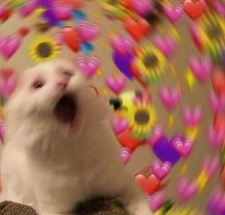

Text(0.5, 1.0, 'Perbandingan nilai asli dengan prediksi model')

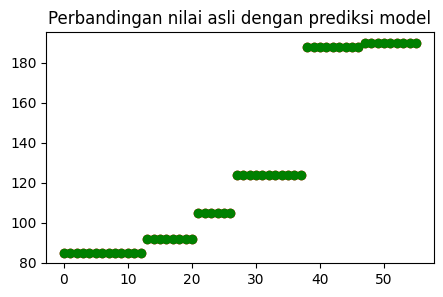

In [ ]:
# mengatur ukuran grafik
plt.figure(figsize=(5, 3))

# mengurutkan nilai asli dari terkecil hingga tertinggi
y_sorted3 = np.sort(y_test3.tolist())
y_sorted_index3 = np.argsort(y_test3.tolist())

# merubah urutan array hasil prediksi berdasarkan urutan y_sorted
predictions_sorted3 = y_pred3[y_sorted_index3]

# menampilkan titik-titik yang mengindikasi nilai asli dan hasil prediksi
plt.scatter(np.arange(0,len(y_sorted3)), y_sorted3, label='Yearly Amount Spent asli', color='red')
plt.scatter(np.arange(0,len(y_sorted3)), predictions_sorted3, label='Yearly Amount Spent prediction', color='green')

# memberikan judul pada grafik
plt.title("Perbandingan nilai asli dengan prediksi model")

# Kesimpulan

Jadi, berdasarkan percobaan yang dilakukan dalam memprediksi kecepatan detak jantung maksimum saat berolahraga dengan linear regression adalah dengan menggunakan model ketiga, yakni dengan menggunakan variabel:

*   total_steps
*   avg_heart_rate
*   max_pace
*   max_cadence
*   time
*   min_heart_rate
*   anaerobic(%)
*   light(%)

menghasilkan prediksi model yang lebih baik, yakni dengan nilai MAE sebesar 8.120488408686859e-15.










### Terima Kasih!

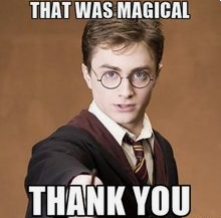